In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data_df = pd.read_csv('bikes_train.csv')

In [3]:
data_df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [4]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [5]:
#columns casual+registered = count

In [6]:
#convert object to datetime
data_df['datetime'] = pd.to_datetime(data_df["datetime"])
data_df['datetime'].dtypes

dtype('<M8[ns]')

In [7]:
#check if there are any null values
data_df.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

In [8]:
data_df['time'] = data_df['datetime'].dt.hour
data_df['day'] = data_df['datetime'].dt.day
data_df['year'] = data_df['datetime'].dt.year
data_df['weekday'] = data_df['datetime'].dt.weekday
data_df['month'] = data_df['datetime'].dt.month

#we have the data for the first 19days of the month

In [9]:
data_df['day'].value_counts().sort_index()

1     575
2     573
3     573
4     574
5     575
6     572
7     574
8     574
9     575
10    572
11    568
12    573
13    574
14    574
15    574
16    574
17    575
18    563
19    574
Name: day, dtype: int64

In [10]:
# You are provided hourly rental data spanning two years.
# For this competition, the training set is comprised of the first 19 days of each month, 
# while the test set is the 20th to the end of the month.
# You must predict the total count of bikes rented during each hour covered by the test set,
# using only information available prior to the rental period.

In [11]:
#avg count of bikes per hour
avg_count_of_bikes_per_hour = data_df.groupby('time')['count'].mean().reset_index()

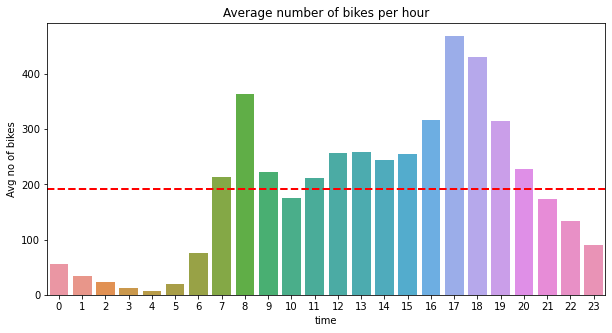

In [12]:
plt.figure(figsize=(10,5))
graph = sns.barplot(x=avg_count_of_bikes_per_hour['time'],y=avg_count_of_bikes_per_hour['count'])
graph.axhline(y=data_df['count'].mean(),color='red',ls='--',linewidth=2)
plt.title("Average number of bikes per hour")
plt.ylabel("Avg no of bikes")
plt.show()

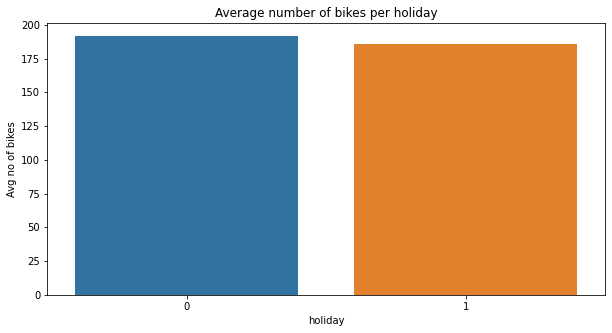

In [13]:
#avg count of bikes on a holiday
avg_count_of_bikes_per_holiday = data_df.groupby('holiday')['count'].mean().reset_index()
plt.figure(figsize=(10,5))
sns.barplot(x=avg_count_of_bikes_per_holiday['holiday'],y=avg_count_of_bikes_per_holiday['count'])
plt.title("Average number of bikes per holiday")
plt.ylabel("Avg no of bikes")
plt.show()

In [14]:
#avg count of bikes per day
avg_count_of_bikes_per_day = data_df.groupby('day')['count'].mean().reset_index()

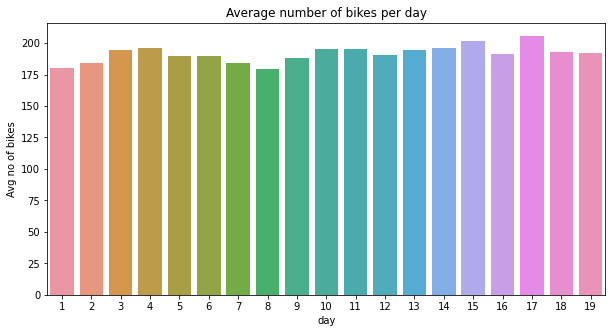

In [15]:
plt.figure(figsize=(10,5))
sns.barplot(x=avg_count_of_bikes_per_day['day'],y=avg_count_of_bikes_per_day['count'])
plt.title("Average number of bikes per day")
plt.ylabel("Avg no of bikes")
plt.show()

In [16]:
#avg count of bikes per weekday
avg_count_of_bikes_per_weekday = data_df.groupby('weekday')['count'].mean().reset_index()

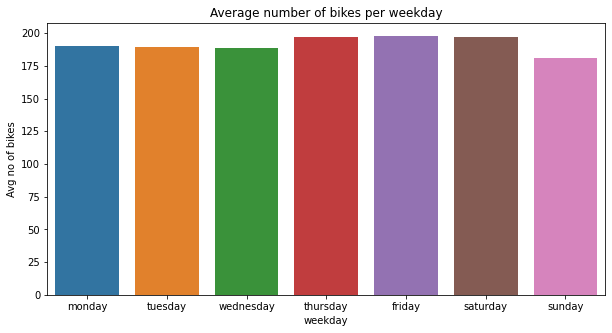

In [17]:
plt.figure(figsize=(10,5))
sns.barplot(x=avg_count_of_bikes_per_weekday['weekday'],y=avg_count_of_bikes_per_weekday['count'])
plt.title("Average number of bikes per weekday")
plt.xticks(ticks=[0,1,2,3,4,5,6],labels=["monday","tuesday","wednesday","thursday","friday","saturday","sunday"])
plt.ylabel("Avg no of bikes")
plt.show()

In [18]:
# wednesday thursday,friday and saturday show more count as compared to other days

In [19]:
#avg count of bikes by season 
avg_count_of_bikes_per_season = data_df.groupby('season')['count'].mean().reset_index()
avg_count_of_bikes_per_season

,season,count
0,1,116.343261
1,2,215.251372
2,3,234.417124
3,4,198.988296


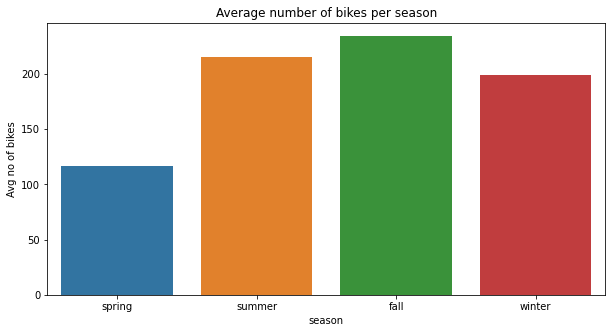

In [20]:
plt.figure(figsize=(10,5))
sns.barplot(x=avg_count_of_bikes_per_season['season'],y=avg_count_of_bikes_per_season['count'])
plt.title("Average number of bikes per season")
plt.xticks(ticks=[0,1,2,3],labels=['spring', 'summer', 'fall', 'winter'])
plt.ylabel("Avg no of bikes")
plt.show()

In [21]:
#people mostly travel out during the summer and fall seasons
# winters and spring are cool and people may not prefer travelling out

In [22]:
#avg count of bikes by weather conditions
avg_count_of_bikes_per_weather = data_df.groupby('weather')['count'].mean().reset_index()
avg_count_of_bikes_per_weather

,weather,count
0,1,205.236791
1,2,178.955540
2,3,118.846333
3,4,164.000000


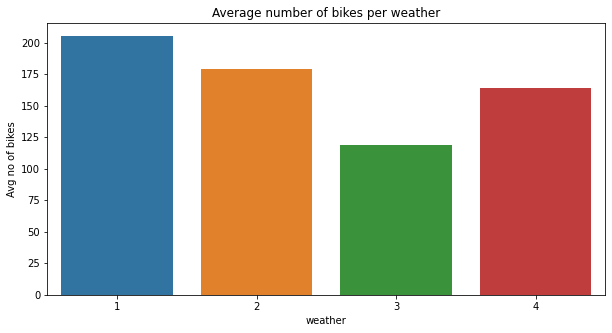

In [23]:
plt.figure(figsize=(10,5))
sns.barplot(x=avg_count_of_bikes_per_weather['weather'],y=avg_count_of_bikes_per_weather['count'])
plt.title("Average number of bikes per weather")
plt.ylabel("Avg no of bikes")
plt.show()

weather - 
1: Clear, Few clouds, Partly cloudy, Partly cloudy 
2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist 
3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds 
4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

#### No of rentals are more when the weather is clear

In [24]:
temp_bins = pd.cut(x=data_df['temp'],bins=4,labels=['0-10','10-20','20-30','30-40'])
temp_bins.value_counts()

20-30    4306
10-20    4044
0-10     1591
30-40     945
Name: temp, dtype: int64

In [25]:
data_df["temp_bins"] = temp_bins
avg_count_of_bikes_per_tempbin = data_df.groupby("temp_bins")['count'].mean().reset_index()
avg_count_of_bikes_per_tempbin

,temp_bins,count
0,0-10,77.228787
1,10-20,159.602127
2,20-30,230.374361
3,30-40,344.107937


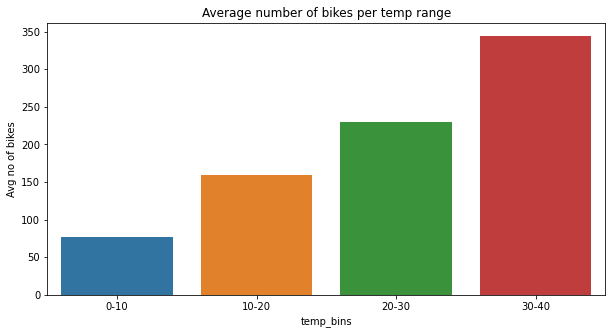

In [26]:
plt.figure(figsize=(10,5))
sns.barplot(x=avg_count_of_bikes_per_tempbin["temp_bins"],y=avg_count_of_bikes_per_tempbin['count'])
plt.title("Average number of bikes per temp range")
plt.ylabel("Avg no of bikes")
plt.show()

### Atemp

In [27]:
atemp_bins = pd.cut(x=data_df['atemp'],bins=4,labels=['0-10','10-20','20-30','30-40'])
atemp_bins.value_counts()

20-30    4654
10-20    4148
30-40    1070
0-10     1014
Name: atemp, dtype: int64

In [28]:
data_df["atemp_bins"] = atemp_bins
avg_count_of_bikes_per_atempbin = data_df.groupby("atemp_bins")['count'].mean().reset_index()
avg_count_of_bikes_per_atempbin

,atemp_bins,count
0,0-10,78.192308
1,10-20,144.111620
2,20-30,229.797379
3,30-40,316.763551


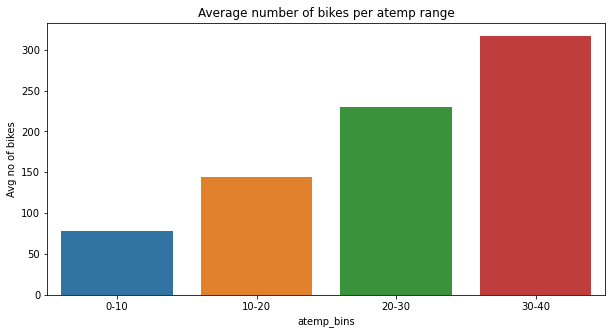

In [29]:
plt.figure(figsize=(10,5))
sns.barplot(x=avg_count_of_bikes_per_atempbin["atemp_bins"],
            y=avg_count_of_bikes_per_atempbin['count'])
plt.title("Average number of bikes per atemp range")
plt.ylabel("Avg no of bikes")
plt.show()

#### at lower temp there are less no of bike rentals and at higher temp or normal temp there are more rentals

humidity - relative humidity
windspeed - wind speed

In [30]:
humidity_bins = pd.cut(x=data_df['humidity'],bins=5,labels=['0-20','20-40','40-60','60-80','80-100'])
humidity_bins.value_counts()

40-60     3564
60-80     3382
80-100    2302
20-40     1560
0-20        78
Name: humidity, dtype: int64

In [31]:
data_df["humidity_bins"] = humidity_bins
avg_count_of_bikes_per_humiditybin = data_df.groupby("humidity_bins")['count'].mean().reset_index()
avg_count_of_bikes_per_humiditybin

,humidity_bins,count
0,0-20,180.384615
1,20-40,290.648718
2,40-60,220.543490
3,60-80,171.275872
4,80-100,109.783666


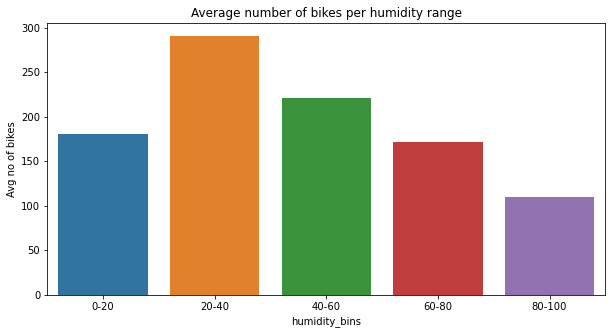

In [32]:
plt.figure(figsize=(10,5))
sns.barplot(x=avg_count_of_bikes_per_humiditybin["humidity_bins"],
            y=avg_count_of_bikes_per_humiditybin['count'])
plt.title("Average number of bikes per humidity range")
plt.ylabel("Avg no of bikes")
plt.show()

In [33]:
# negative relation between humidity and rentals
windspeed_bins = pd.cut(x=data_df['windspeed'],bins=5,labels=['0-10','10-20','20-30','30-40','40-50'])
windspeed_bins.value_counts()

0-10     5396
10-20    4367
20-30     976
30-40     138
40-50       9
Name: windspeed, dtype: int64

In [34]:
data_df["windspeed_bins"] = windspeed_bins
avg_count_of_bikes_per_windspeedbin = data_df.groupby("windspeed_bins")['count'].mean().reset_index()
avg_count_of_bikes_per_windspeedbin

,windspeed_bins,count
0,0-10,171.720719
1,10-20,210.086558
2,20-30,217.713115
3,30-40,200.992754
4,40-50,133.111111


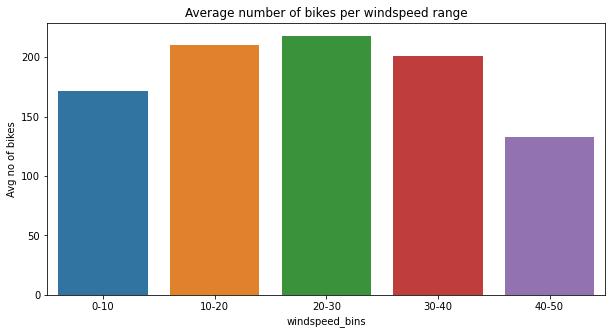

In [35]:
plt.figure(figsize=(10,5))
sns.barplot(x=avg_count_of_bikes_per_windspeedbin["windspeed_bins"],
            y=avg_count_of_bikes_per_windspeedbin['count'])
plt.title("Average number of bikes per windspeed range")
plt.ylabel("Avg no of bikes")
plt.show()

In [36]:
# when windspeed is moderate the rentals are more

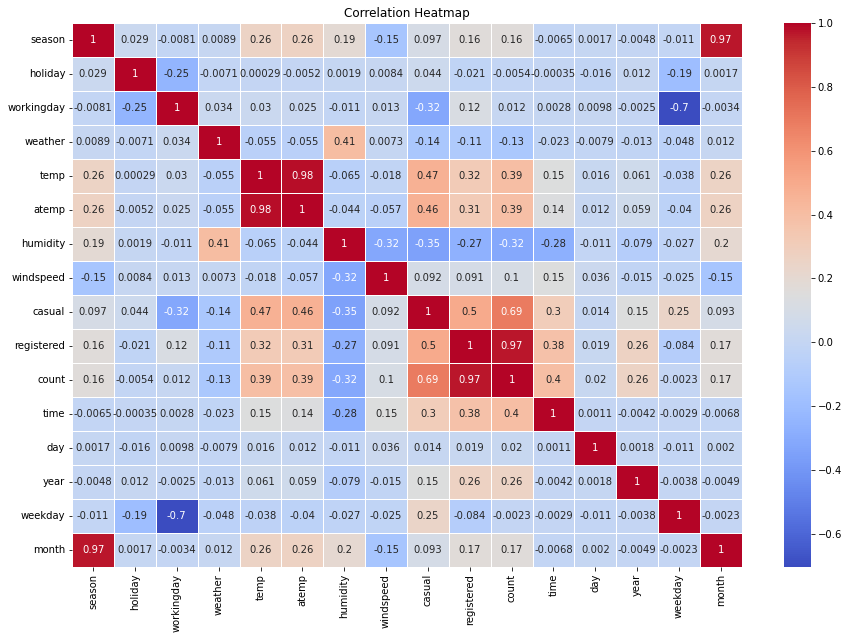

In [37]:
plt.figure(figsize=(15,10))
sns.heatmap(data_df.corr(), annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()

In [38]:
train_data_set = data_df[(data_df['day'] != 18) &( data_df['day']!= 19)]
test_data_set = data_df[(data_df['day']== 18) |( data_df['day']== 19)]

In [39]:
print("Length of Training data",len(train_data_set))
print("Length of Testing data",len(test_data_set))

print("Number of Training data columns",len(train_data_set.columns))
print("Number of Testing data columns",len(test_data_set.columns))

Length of Training data 9749
Length of Testing data 1137
Number of Training data columns 21
Number of Testing data columns 21


In [40]:
target_feature = ['count']
ind_features = ['season', 'holiday', 'workingday', 'weather', 'temp',
                'atemp', 'humidity', 'windspeed', 'casual', 'registered',
                'time', 'day', 'year', 'weekday', 'month']

categorical_features = ['season', 'holiday', 'workingday', 'weather', 'time', 'year', 'weekday', 'month']

### OneHotEncoding

In [41]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()

In [42]:
data_df_encoded = ohe.fit_transform(data_df[categorical_features]).toarray()
data_encoded_df = pd.DataFrame(data_df_encoded,columns=ohe.get_feature_names_out(), index = data_df.index)
data_df_new= pd.concat([data_df,data_encoded_df],axis=1)

In [43]:
y_train = data_df_new["count"].iloc[train_data_set.index]
y_test  = data_df_new["count"].iloc[test_data_set.index]

In [44]:
drop_features = categorical_features+["datetime","casual","registered","count",'temp_bins', 'atemp_bins',
       'humidity_bins', 'windspeed_bins']

In [45]:
data_df_new.drop(drop_features,axis=1,inplace=True)

X_train = data_df_new.iloc[train_data_set.index]
X_test  = data_df_new.iloc[test_data_set.index]

### Linear Regression

In [46]:
from sklearn.linear_model import LinearRegression
lr_model = LinearRegression()
lr_model.fit(X_train,y_train)

LinearRegression()

In [47]:
print(f"The Linear model is trained using {len(X_train.columns)} columns")
print("The coefficient are", lr_model.coef_)

The Linear model is trained using 62 columns
The coefficient are [ 1.81059449e+00  2.70372304e+00 -8.01978446e-01 -3.75284135e-01
  7.38679213e-01 -2.34593201e+12 -9.31364476e+11 -5.01070229e+11
 -9.07916733e+11  6.08007194e+11  1.45176614e+12 -8.36839158e+11
  6.91978883e+09  2.09331116e+12  2.09331116e+12  2.09331116e+12
  2.09331116e+12  4.37936528e+10  4.37936528e+10  4.37936527e+10
  4.37936527e+10  4.37936527e+10  4.37936527e+10  4.37936528e+10
  4.37936529e+10  4.37936531e+10  4.37936529e+10  4.37936529e+10
  4.37936529e+10  4.37936529e+10  4.37936529e+10  4.37936529e+10
  4.37936529e+10  4.37936530e+10  4.37936532e+10  4.37936531e+10
  4.37936530e+10  4.37936529e+10  4.37936529e+10  4.37936528e+10
  4.37936528e+10  2.81049784e+11  2.81049784e+11  3.11768151e+09
  3.11768151e+09  3.11768152e+09  3.11768152e+09  3.11768152e+09
  8.46876628e+11  8.46876628e+11  5.16635695e+11  5.16635695e+11
  5.16635695e+11 -8.97931840e+11 -8.97931840e+11 -8.97931840e+11
 -1.32822609e+12 -1.32822

In [48]:
pd.DataFrame({"Features":list(X_train.columns),
              "Coefficients": list(lr_model.coef_)}).T

,0,1,2,3,4,5,6,7,8,9,...,52,53,54,55,56,57,58,59,60,61
Features,temp,atemp,humidity,windspeed,day,season_1,season_2,season_3,season_4,holiday_0,...,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
Coefficients,1.810594,2.703723,-0.801978,-0.375284,0.738679,-2345932010696.790527,-931364475715.869629,-501070228834.436646,-907916733118.966797,608007194066.343872,...,516635695122.861267,-897931839829.918457,-897931839806.408691,-897931839812.705933,-1328226086717.537598,-1328226086707.857422,-1328226086682.562988,-921379582380.796875,-921379582398.894043,-921379582403.978516


In [ ]:
lr_model.get_params()

In [49]:
y_pred=lr_model.predict(X_test)

In [50]:
lr_model.score(X_test,y_test)

0.6906781542683009

In [51]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.6906781542683009

### check the model performance after standardising

In [52]:
data_df_new_std = data_df_new

In [53]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
std_arr=sc.fit_transform(data_df_new_std[['temp','atemp','humidity','windspeed']])

In [54]:
data_df_new_std[['temp','atemp','humidity','windspeed']] = pd.DataFrame(std_arr, columns=['temp','atemp','humidity','windspeed'])

In [55]:
X_train = data_df_new_std.iloc[train_data_set.index]
X_test  = data_df_new_std.iloc[test_data_set.index]

In [56]:
lr_model.fit(X_train,y_train)
y_pred=lr_model.predict(X_test)

In [57]:
lr_model.score(X_test,y_test)

0.6906973168299235